# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ekiny\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="Bitcoin", language="en")

bitcoin_news

{'status': 'ok',
 'totalResults': 8745,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Richard Lawler',
   'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
   'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
   'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
   'publishedAt': '2021-11-05T13:32:14Z',
   'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\

In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="Ethereum", language="en")

ethereum_news

{'status': 'ok',
 'totalResults': 3314,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Mitchell Clark',
   'title': 'The NFT Bay asks if you would steal all the JPEGs',
   'description': 'The NFT Bay is an incredible piece of performance art that promises to let you download all the NFTs on the Ethereum blockchain. The torrent contains nearly 20TB worth of files, and works as a commentary on collecting and owning.',
   'url': 'https://www.theverge.com/2021/11/18/22790131/nft-bay-pirating-digital-ownership-piracy-crypto-art-right-click',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/UMHdxnP0BlxxYxbIu9Ea5K1QwGk=/0x0:2028x1062/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/23025815/Screen_Shot_2021_11_18_at_14.21.58.png',
   'publishedAt': '2021-11-19T02:01:07Z',
   'content': 'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley ha

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def create_sent(articles):
    df = []
    for x in articles:
        content = x['content']
        sent = analyzer.polarity_scores(content)
        df.append({
            "text":content,
            "neg":sent["neg"],
            "neu":sent["neu"],
            "pos":sent["pos"],
            "compound":sent["compound"],
        })
    #     a =1
    return pd.DataFrame(df)

In [7]:
bit_df = create_sent(bitcoin_news['articles'])
eth_df = create_sent(ethereum_news['articles'])

In [8]:
bit_df.head()

,text,neg,neu,pos,compound
0,A similar hoax earlier this year tied Walmart ...,0.063,0.937,0.000,-0.2732
1,Theres a big new presence slurping up power fr...,0.000,0.904,0.096,0.3612
2,"For all the talk of democratizing finance, the...",0.000,1.000,0.000,0.0000
3,"In keeping with a previous announcement, AMC t...",0.000,0.847,0.153,0.5719
4,Representation of cryptocurrency Bitcoin is pl...,0.000,1.000,0.000,0.0000


In [9]:
eth_df.head()

,text,neg,neu,pos,compound
0,"If you claim ownership, someone will probably ...",0.0,0.784,0.216,0.7783
1,"In keeping with a previous announcement, AMC t...",0.0,0.847,0.153,0.5719
2,Ethereum and bitcoin are the two biggest crypt...,0.0,0.906,0.094,0.4588
3,Elon Musk\r\npicture alliance / Getty Images\r...,0.0,0.907,0.093,0.5267
4,Cryptocurrency and business continuity line im...,0.0,0.903,0.097,0.4588


In [10]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

In [11]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.00000,20.000000
mean,0.013650,0.942150,0.04420,0.125040
std,0.039723,0.068533,0.06625,0.337172
min,0.000000,0.801000,0.00000,-0.680800
25%,0.000000,0.895250,0.00000,0.000000
50%,0.000000,0.978500,0.00000,0.000000
75%,0.000000,1.000000,0.09775,0.385600
max,0.167000,1.000000,0.19900,0.755800


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,neg,neu,pos,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.006200,0.916300,0.077450,0.307340
std,0.019083,0.077373,0.078558,0.340277
min,0.000000,0.779000,0.000000,-0.318200
25%,0.000000,0.862750,0.000000,0.000000
50%,0.000000,0.915500,0.074000,0.381550
75%,0.000000,1.000000,0.111750,0.549700
max,0.062000,1.000000,0.221000,0.822500


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH has a greater mean positive score (0.073050) when compared to BTC (0.068450).

Q: Which coin had the highest compound score?

A: ETH has a higher compound score of (0.735100) when compared to BTC (0.690800).

Q. Which coin had the highest positive score?

A: ETH has the highest positive score of 0.180000 when compared to BTC 0.161000.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = ["the", "will", "of", "with"]

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words_tokenized = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words_tokenized]
   
    # Convert the words to lowercase
    words_lowercase = [word.lower() for word in lem]
    
    # Remove the stop words
    words_str = ' '.join(words_lowercase)
            
    tokens = [word for word in words_lowercase if word not in sw.union(sw_addons)]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokens_list = []

for text in bit_df['text']:
    
    tokenized_text = tokenizer(text)
    
    btc_tokens_list.append(tokenized_text)

In [19]:
bit_df["tokens"] = btc_tokens_list

bit_df = bit_df[["compound", "pos", "neg", "neu", "text", "tokens"]] 

bit_df.head()

,compound,pos,neg,neu,text,tokens
0,-0.2732,0.000,0.063,0.937,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,0.3612,0.096,0.000,0.904,Theres a big new presence slurping up power fr...,"[theres, big, new, presence, slurping, power, ..."
2,0.0000,0.000,0.000,1.000,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,..."
3,0.5719,0.153,0.000,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,0.0000,0.000,0.000,1.000,Representation of cryptocurrency Bitcoin is pl...,"[representation, cryptocurrency, bitcoin, plac..."


In [29]:
# Create a new tokens list for Bitcoin across all texts
btc_text = str(list(bit_df['text']))

btc_tokens = tokenizer(btc_text)

print(f"Here is an example of BTC word tokens: {btc_tokens[:50]}")
print()
print(f"The total number of BTC word tokens are: {len(btc_tokens)}")

Here is an example of BTC word tokens: ['similar', 'hoax', 'earlier', 'year', 'tied', 'walmart', 'litecoinrnif', 'buy', 'something', 'verge', 'link', 'vox', 'media', 'may', 'earn', 'commission', 'see', 'ethic', 'statementrnphoto', 'illustration', 'thiago', 'prudencios', 'char', 'theres', 'big', 'new', 'presence', 'slurping', 'power', 'us', 'grid', 'growing', 'bitcoin', 'miner', 'new', 'research', 'show', 'us', 'ha', 'overtaken', 'china', 'top', 'global', 'destination', 'bitcoin', 'mining', 'char', 'talk', 'democratizing', 'finance']

The total number of BTC word tokens are: 415


In [30]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokens_list = []

for text in eth_df['text']:
    
    tokenized_text = tokenizer(text)
    
    eth_tokens_list.append(tokenized_text)

In [31]:
eth_df["tokens"] = eth_tokens_list

eth_df = eth_df[["compound", "pos", "neg", "neu", "text", "tokens"]] 

eth_df.head()

,compound,pos,neg,neu,text,tokens
0,0.7783,0.216,0.0,0.784,"If you claim ownership, someone will probably ...","[claim, ownership, someone, probably, want, ta..."
1,0.5719,0.153,0.0,0.847,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
2,0.4588,0.094,0.0,0.906,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,0.5267,0.093,0.0,0.907,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,0.4588,0.097,0.0,0.903,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, i..."


In [37]:
# Create a new tokens column for Ethereum
eth_text = str(list(eth_df['text']))

eth_tokens = tokenizer(eth_text)

print(f"Here is an example of ETH word tokens: {eth_tokens[:10]}")
print()
print(f"The total number of ETH word tokens are: {len(eth_tokens)}")

Here is an example of ETH word tokens: ['claim', 'ownership', 'someone', 'probably', 'want', 'take', 'itrnin', 'may', 'one', 'better']

The total number of ETH word tokens are: 413


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [39]:
# Bitcoin Counter
btc_word_count = Counter(btc_tokens)

print(f"Here's the word count: \n"
      f"\n"
      f"{dict(btc_word_count)}")
print()
print(f"Here's the most commont: {dict(btc_word_count.most_common(10))}")

Here's the word count: 

{'similar': 2, 'hoax': 1, 'earlier': 1, 'year': 2, 'tied': 1, 'walmart': 1, 'litecoinrnif': 1, 'buy': 1, 'something': 1, 'verge': 1, 'link': 1, 'vox': 1, 'media': 1, 'may': 3, 'earn': 1, 'commission': 3, 'see': 1, 'ethic': 1, 'statementrnphoto': 1, 'illustration': 6, 'thiago': 1, 'prudencios': 1, 'char': 19, 'theres': 1, 'big': 1, 'new': 4, 'presence': 1, 'slurping': 1, 'power': 1, 'us': 4, 'grid': 1, 'growing': 1, 'bitcoin': 26, 'miner': 1, 'research': 1, 'show': 1, 'ha': 3, 'overtaken': 1, 'china': 1, 'top': 1, 'global': 1, 'destination': 1, 'mining': 2, 'talk': 2, 'democratizing': 1, 'finance': 1, 'vast': 1, 'majority': 1, 'continues': 1, 'owned': 1, 'relative': 1, 'handful': 1, 'investorsrnas': 1, 'flagged': 1, 'bloomberg': 1, 'newly': 1, 'released': 1, 'data': 1, 'national': 2, 'bureau': 1, 'keeping': 1, 'previous': 1, 'announcement': 1, 'amc': 1, 'theater': 1, 'accept': 1, 'cryptocurrencies': 1, 'payment': 2, 'online': 1, 'purchasesxarnbitcoin': 1, 'ether

In [40]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigrams = Counter(ngrams(btc_tokens,n=2))

print(f"Here BTC bigrams: \n"
      f"\n"
      f"{dict(btc_bigrams)}")

Here BTC bigrams: 

{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinrnif'): 1, ('litecoinrnif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementrnphoto'): 1, ('statementrnphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'char'): 1, ('char', 'theres'): 1, ('theres', 'big'): 1, ('big', 'new'): 1, ('new', 'presence'): 1, ('presence', 'slurping'): 1, ('slurping', 'power'): 1, ('power', 'us'): 1, ('us', 'grid'): 1, ('grid', 'growing'): 1, ('growing', 'bitcoin'): 1, ('bitcoin', 'miner'): 1, ('miner', 'new'): 1, ('new', 'research'): 1, ('research', 'show'): 1, ('show', 'us'): 1, ('us', 'ha'): 1, ('ha', 'overtaken'): 1, ('overtaken', 'china')

In [41]:
# Ethereum Counter
eth_word_count = Counter(eth_tokens)

print(f"Here's the word count: \n"
      f"\n"
      f"{dict(eth_word_count)}")
print()
print(f"Here's the most commont: {dict(eth_word_count.most_common(10))}")

Here's the word count: 

{'claim': 1, 'ownership': 1, 'someone': 2, 'probably': 1, 'want': 1, 'take': 2, 'itrnin': 1, 'may': 2, 'one': 2, 'better': 1, 'piece': 1, 'performance': 1, 'art': 1, 'year': 2, 'australian': 1, 'geoffrey': 1, 'huntley': 1, 'ha': 5, 'created': 1, 'website': 2, 'promise': 1, 'char': 20, 'keeping': 1, 'previous': 1, 'announcement': 1, 'amc': 1, 'theater': 1, 'accept': 1, 'cryptocurrencies': 2, 'payment': 1, 'online': 2, 'purchasesxarnbitcoin': 1, 'ethereum': 8, 'bitcoin': 10, 'cash': 2, 'litecoin': 2, 'acceptedxarnpreviously': 1, 'compa': 1, 'two': 2, 'biggest': 1, 'cryptocurrenciesrnjordan': 1, 'mansfield': 1, 'getty': 4, 'imagesrncrypto': 1, 'investor': 2, 'holding': 1, 'rather': 1, 'interest': 2, 'rate': 1, 'rise': 1, 'jpmorgan': 1, 'said': 3, 'beca': 1, 'elon': 2, 'muskrnpicture': 1, 'alliance': 1, 'imagesrna': 1, 'cryptocurrency': 8, 'named': 1, 'musk': 1, 'shot': 1, 'moon': 1, 'gain': 1, 'october': 1, 'rndogelon': 1, 'mars': 1, 'traded': 1, 'november': 1, 'b

In [43]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigrams = Counter(ngrams(eth_tokens,n=2))

print(f"Here ETH bigrams: \n"
      f"\n"
      f"{dict(eth_bigrams)}")

Here ETH bigrams: 

{('claim', 'ownership'): 1, ('ownership', 'someone'): 1, ('someone', 'probably'): 1, ('probably', 'want'): 1, ('want', 'take'): 1, ('take', 'itrnin'): 1, ('itrnin', 'may'): 1, ('may', 'one'): 1, ('one', 'better'): 1, ('better', 'piece'): 1, ('piece', 'performance'): 1, ('performance', 'art'): 1, ('art', 'year'): 1, ('year', 'australian'): 1, ('australian', 'geoffrey'): 1, ('geoffrey', 'huntley'): 1, ('huntley', 'ha'): 1, ('ha', 'created'): 1, ('created', 'website'): 1, ('website', 'promise'): 1, ('promise', 'char'): 1, ('char', 'keeping'): 1, ('keeping', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'amc'): 1, ('amc', 'theater'): 1, ('theater', 'accept'): 1, ('accept', 'cryptocurrencies'): 1, ('cryptocurrencies', 'payment'): 1, ('payment', 'online'): 1, ('online', 'purchasesxarnbitcoin'): 1, ('purchasesxarnbitcoin', 'ethereum'): 1, ('ethereum', 'bitcoin'): 2, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'acceptedxarnpreviously'):

In [45]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [46]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_top10_token_count = token_count(btc_tokens)

print(f"Here are the top 10 words for BTC: \n"
      f" \n"
      f"{dict(btc_top10_token_count)}")

Here are the top 10 words for BTC: 
 
{'bitcoin': 26, 'char': 19, 'reuters': 7}


In [47]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top10_token_count = token_count(eth_tokens)

print(f"Here are the top 10 words for ETH: \n"
      f" \n"
      f"{dict(eth_top10_token_count)}")

Here are the top 10 words for ETH: 
 
{'char': 20, 'bitcoin': 10, 'ethereum': 8}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [49]:
btc_token_str = ' '.join(btc_tokens)
btc_token_str

'similar hoax earlier year tied walmart litecoinrnif buy something verge link vox media may earn commission see ethic statementrnphoto illustration thiago prudencios char theres big new presence slurping power us grid growing bitcoin miner new research show us ha overtaken china top global destination bitcoin mining char talk democratizing finance vast majority bitcoin continues owned relative handful investorsrnas flagged bloomberg newly released data national bureau char keeping previous announcement amc theater accept cryptocurrencies payment online purchasesxarnbitcoin ethereum bitcoin cash litecoin acceptedxarnpreviously compa char representation cryptocurrency bitcoin placed pc motherboard illustration taken june reutersdado ruvicillustrationhong kong oct reuters bitcoin fell slightly char representation virtual cryptocurrency bitcoin seen picture illustration taken october reutersedgar sulondon oct reuters bitcoin cusp alltime hi char representation virtual cryptocurrency bitcoi

Text(0.5, 1.0, 'Bitcoin Word Cloud')

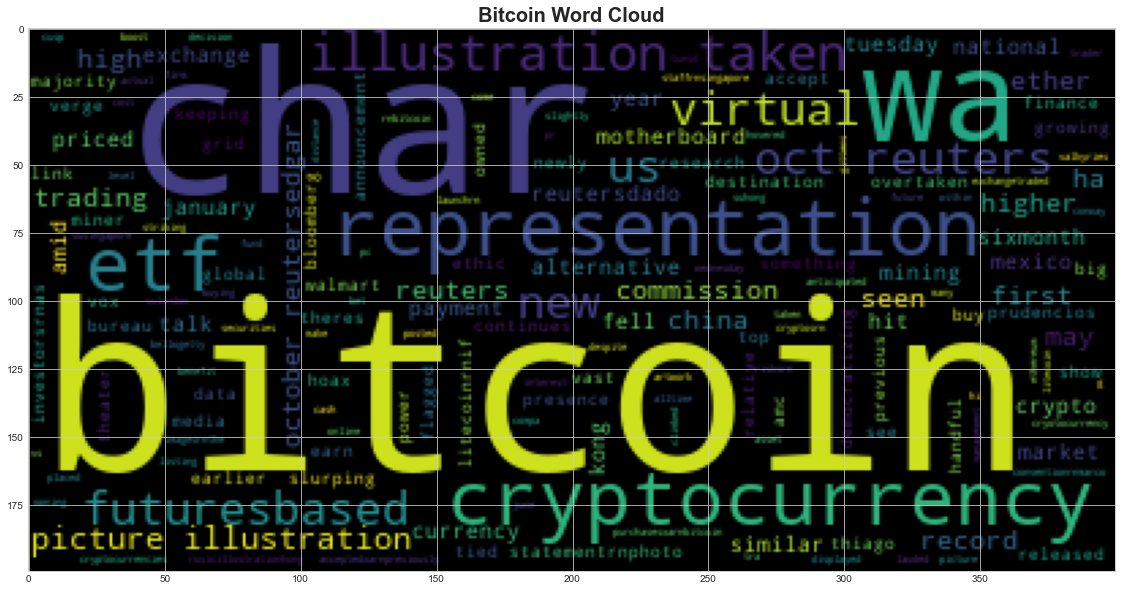

In [50]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_token_str = ' '.join(btc_tokens)

btc_wc = WordCloud().generate(btc_token_str)

plt.imshow(btc_wc)
plt.title("Bitcoin Word Cloud", fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Ethereum Word Cloud')

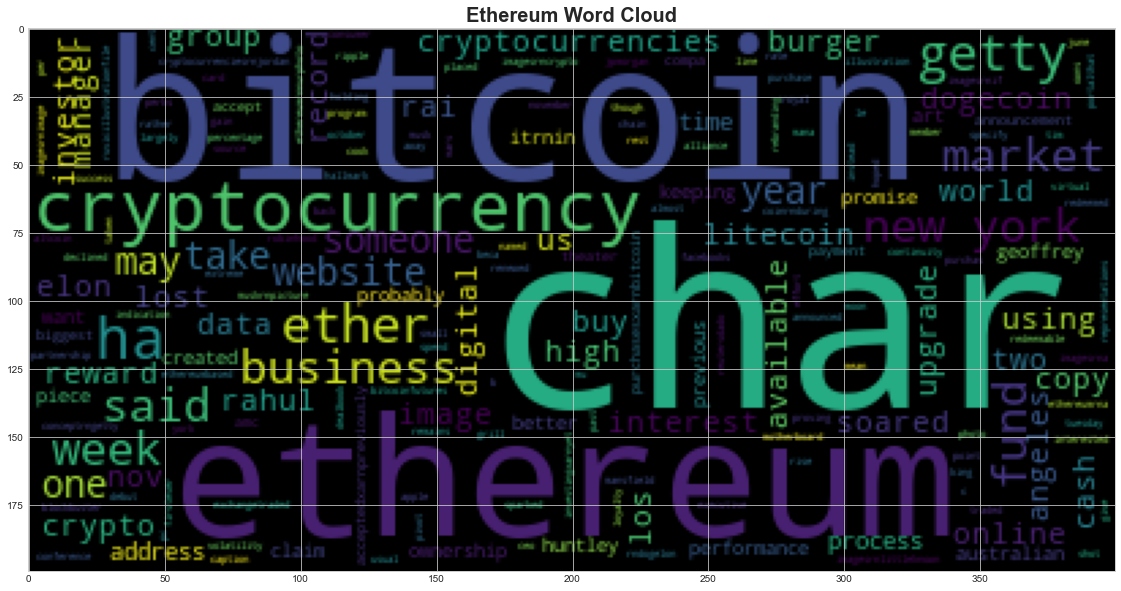

In [51]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_token_str = ' '.join(eth_tokens)

etc_wc = WordCloud().generate(eth_token_str)

plt.imshow(etc_wc)
plt.title("Ethereum Word Cloud", fontsize=20, fontweight='bold')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [52]:
import spacy
from spacy import displacy

In [53]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_text

'[\'A similar hoax earlier this year tied Walmart to Litecoin\\r\\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\\r\\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]\', \'Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]\', \'For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\\r\\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]\', \'In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\\xa0\\r\\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\\xa0\\r\\nPreviously, the compa… [+1036 chars]\', \'Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustratio

In [56]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data["title"] = "BTC Named Entity Recognition (NER) document"

In [57]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [58]:
# List all Entities
# YOUR CODE HERE!
print(f"These are BTC entities: \n"
      f"\n"
      f"{btc_ner.ents}")

These are BTC entities: 

(earlier this year, Verge, Vox Media, Thiago Prudencio/S, U.S., U.S., China, Bitcoin, Bloomberg, the National Bureau, AMC, Ethereum, June 29, 2021, REUTERS, Dado Ruvic/IllustrationHONG KONG, Oct 21, Reuters, October 19, 2021, REUTERS, Edgar SuLONDON, Oct 20, Reuters, October 19, 2021, REUTERS, Edgar SuHONG KONG, Oct 20, Reuters, Wednesday, first, U.S., Conway G. Gittens, October 18, 2021, REUTERS, Edgar SuSINGAPORE, Oct 19, Reuters, six-month, Reuters, Reuters, six-month, Tuesday, U.S., 2021, Valkyrie, ETF, launch\r\n* ETF, ETF, >Bloomberg, first, ETF, 7%, Monday, morning, around $66,105, 3%, 4,722.\r\nDogecoin, over 9%, Australian Baseball League, Perth Heat, first, Mexican, Volaris, Benito Juarez International Airport, Mexico City, Mexico, January 10, 2018, January 10, 2018, 68,000, 5k\r\n, CoinGecko, more than $3, May 20, 2021, REUTERS, Dado Ruvic/File PhotoLONDON, Nov 16, Reuters, 60, Chinas, mining.\r\nOn Tuesday, Chinas National Development and Reform Co

---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
eth_text

'[\'If you claim ownership, someone will probably want to take it\\r\\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars]\', \'In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\\xa0\\r\\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\\xa0\\r\\nPreviously, the compa… [+1036 chars]\', \'Ethereum and bitcoin are the two biggest cryptocurrencies.\\r\\nJordan Mansfield /Getty Images\\r\\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars]\', \'Elon Musk\\r\\npicture alliance / Getty Images\\r\\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \\r\\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars]\', "Cryptocurrency and business continuity line image for business concept.\\r\\n

In [60]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_ner = nlp(eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_ner.user_data["title"] = "ETH Named Entity Recognition (NER) document"

In [61]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_ner, style='ent')

In [62]:
# List all Entities
# YOUR CODE HERE!
print(f"These are ETH entities: \n"
      f"\n"
      f"{eth_ner.ents}")

These are ETH entities: 

(it\r\nIn, this year, Australian Geoffrey Huntley, AMC, Ethereum, Ethereum, two, JPMorgan, Elon Musk, 3,780%, October, Mars, 0.00000229, November 1, 0.0, the past week, Apple, Tim Cook, The New York Times', Tuesday, 1-2%, Ethereum.\r\nNurPhoto, first, June 29, 2021, REUTERS, Dado Ruvic/Illustration/File Photo MU, almost 20 per cent, less than two weeks, Burger King, Robinhood, Bitcoin , Ethereum and Dogecoin, Royal Perks, 5, Getty, US, Rahul Rai, Market Neutral, BlockTower, Rahul Rai, nearly 20, TB, NFT, second, 4,400, Friday, Ethereum, Bitcoin’s, second, NEW YORK, Nov 8, Reuters, a record $6.4 billion, this year, CoinShares, American Airlines, Airbus, A321-200, Los Angeles International, Los Angeles, California, U.S., March 28, 2018, REUTERS, Mike Blake/File, Nov 16, Reute, Thursday, 6:13 p.m., New York, Ethereum, CryptoPunk, 0x8e39, Quentin Tarantino\'s, 1994, Pulp Fiction, the coming weeks)


---